In [7]:
# Import pandas library
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Display the first few rows of the DataFrame
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [11]:
# Step 1: Identify numerical and categorical columns
# For simplicity, let's assume that columns with object dtype are categorical and others are numerical
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Step 2: Create separate DataFrames for numerical and categorical data
numerical_data = df[numerical_columns]
categorical_data = df[categorical_columns]

# Display the first few rows of each DataFrame
print("Numerical Data:")
print(numerical_data.head())

print("\nCategorical Data:")
print(categorical_data.head())

Numerical Data:
    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0

Categorical Data:
   Gender family_history_with_overweight FAVC       CAEC SMOKE  SCC  \
0  Female                            yes   no  Sometimes    no   no   
1  Female                            yes   no  Sometimes   yes  yes   
2    Male                            yes   no  Sometimes    no   no   
3    Male                             no   no  Sometimes    no   no   
4    Male                             no   no  Sometimes    no   no   

         CALC                 MTRANS           NObeyesdad  
0          no  Public_Transportation        Normal_Weight  
1   Sometimes  Public_Transportation        Normal_Weight  
2  Frequently  Public_Transportation        Normal_W

In [13]:
# Step 2: Apply mean imputation on numerical data
for column in numerical_columns:
    mean_value = df[column].mean()  # Calculate the mean of the column
    df[column].fillna(mean_value, inplace=True)  # Replace missing values with the mean

# Display the first few rows of the DataFrame to verify the imputation
df.head()

# Optionally, display the first few rows of the numerical data to verify
numerical_data = df[numerical_columns]
numerical_data.head()

C:\Users\chaitanya\AppData\Local\Temp\ipykernel_16832\2467602331.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)  # Replace missing values with the mean


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


Before Imputation:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000 

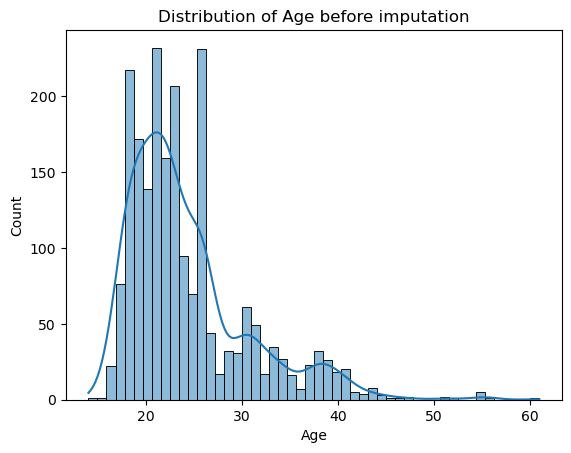

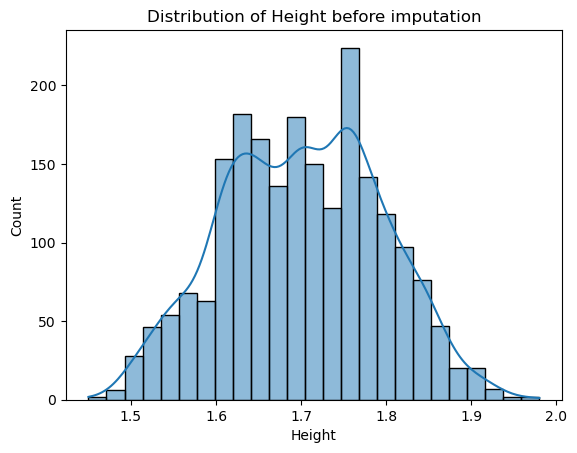

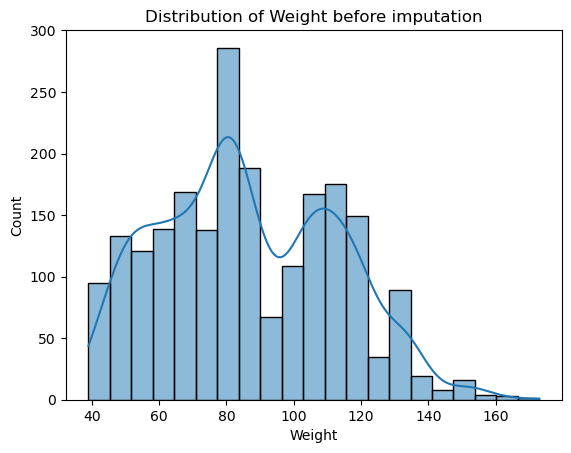

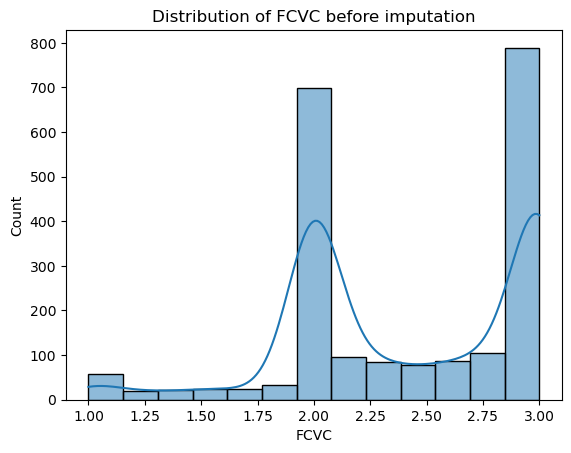

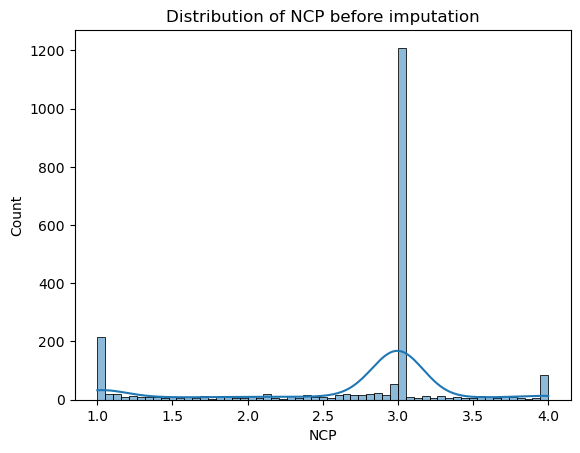

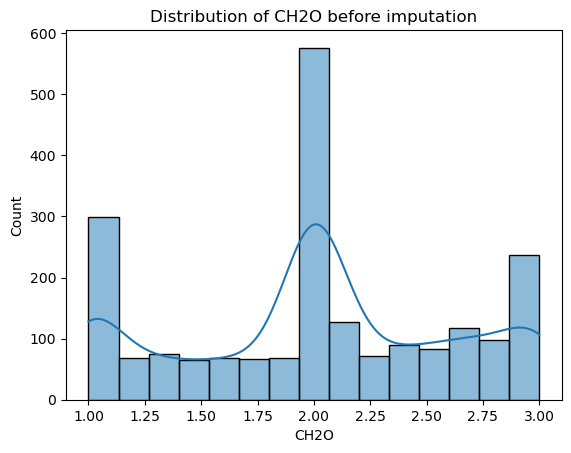

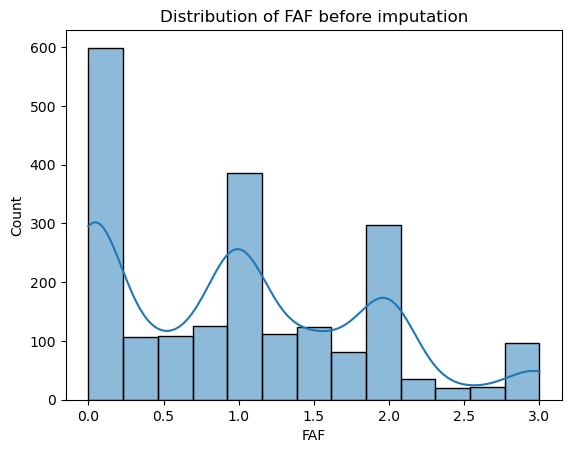

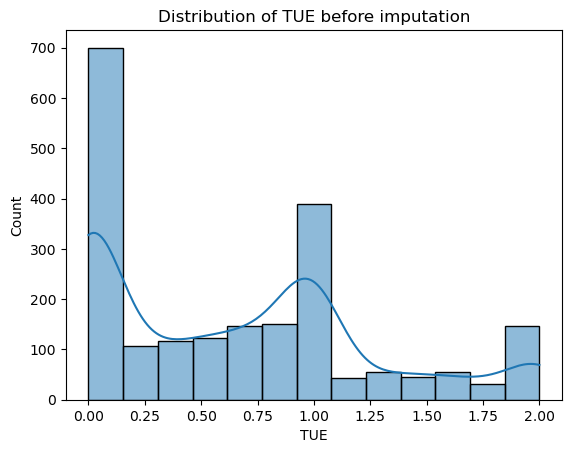

After Imputation:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000  

C:\Users\chaitanya\AppData\Local\Temp\ipykernel_16832\994370786.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)  # Replace missing values with the mean


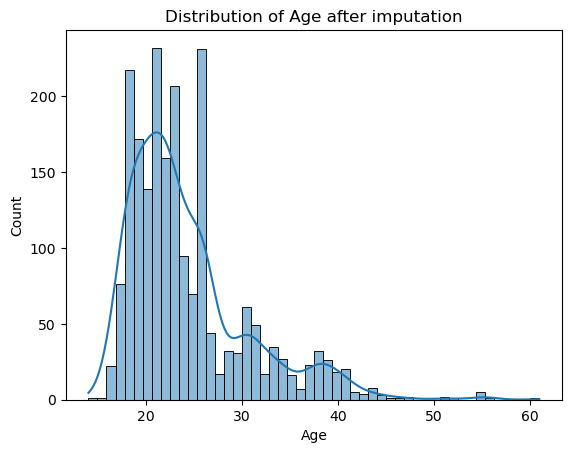

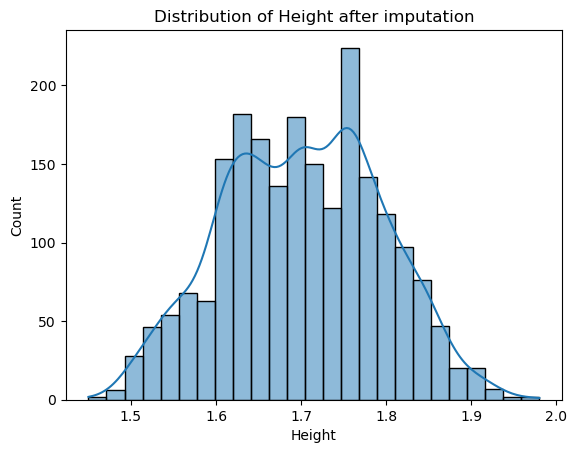

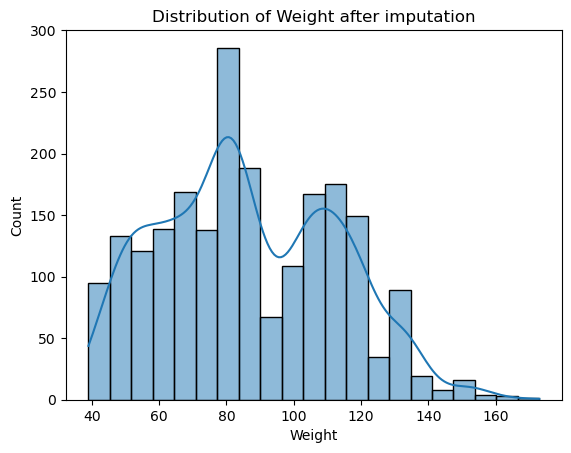

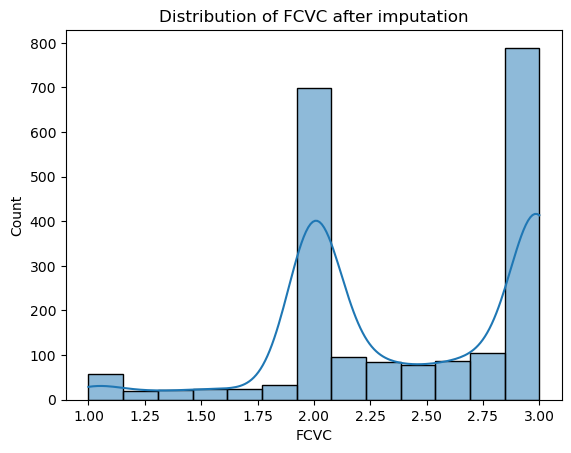

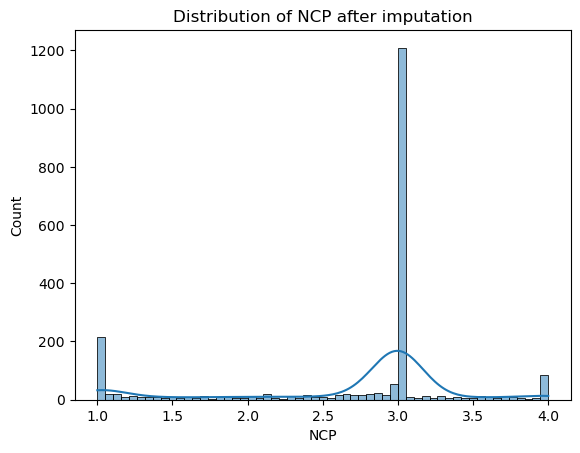

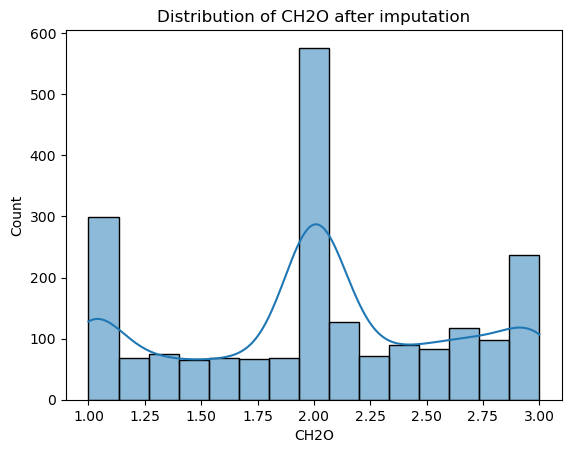

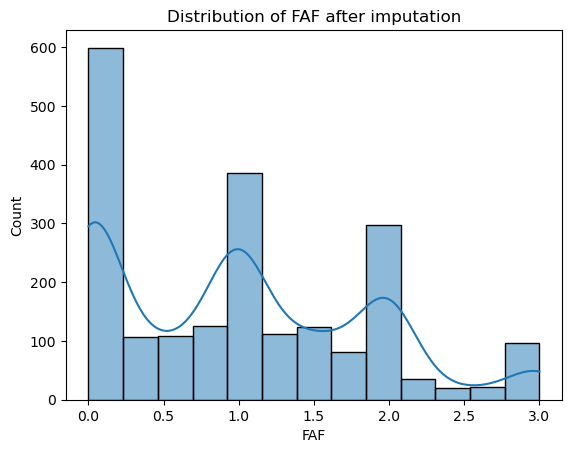

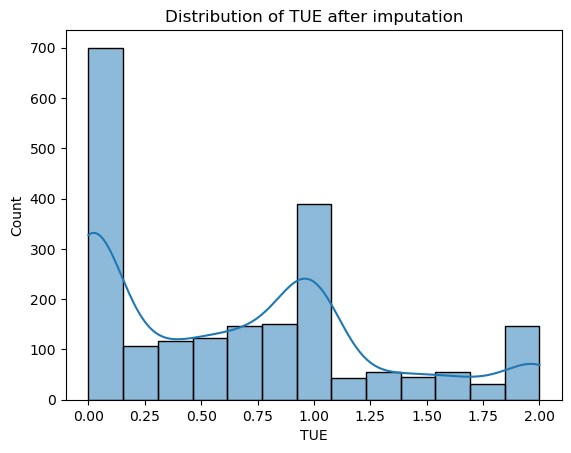

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Before imputation: Statistical summary and distribution
print("Before Imputation:")
print(df[numerical_columns].describe())

# Plot distributions before imputation
for column in numerical_columns:
    sns.histplot(df[column], kde=True).set(title=f'Distribution of {column} before imputation')
    plt.show()

# Apply mean imputation on numerical data
for column in numerical_columns:
    mean_value = df[column].mean()  # Calculate the mean of the column
    df[column].fillna(mean_value, inplace=True)  # Replace missing values with the mean

# After imputation: Statistical summary and distribution
print("After Imputation:")
print(df[numerical_columns].describe())

# Plot distributions after imputation
for column in numerical_columns:
    sns.histplot(df[column], kde=True).set(title=f'Distribution of {column} after imputation')
    plt.show()


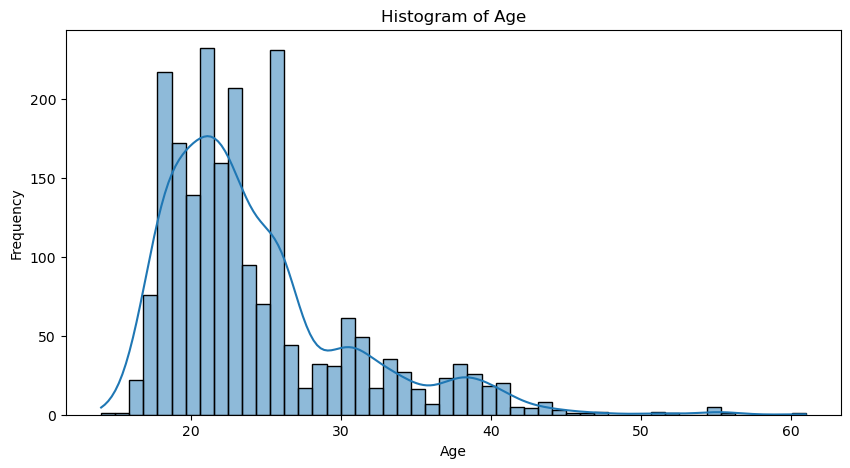

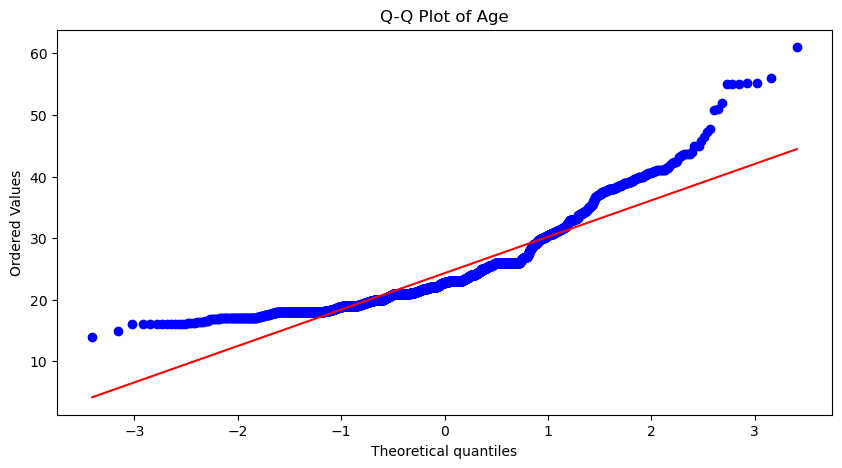

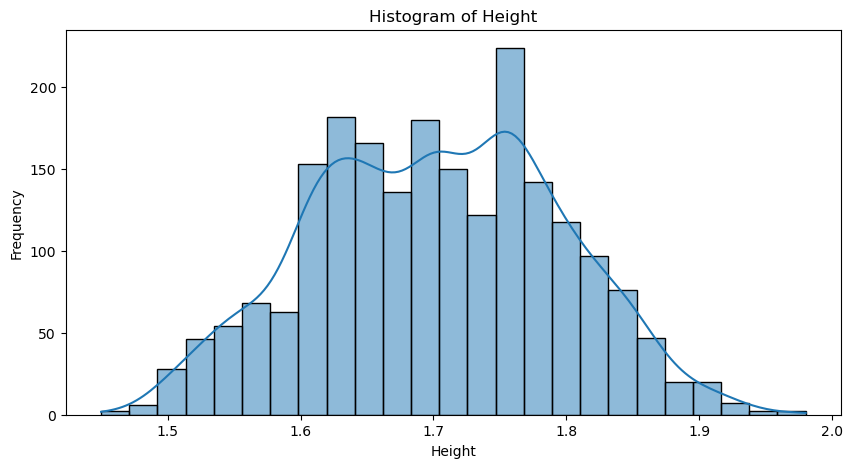

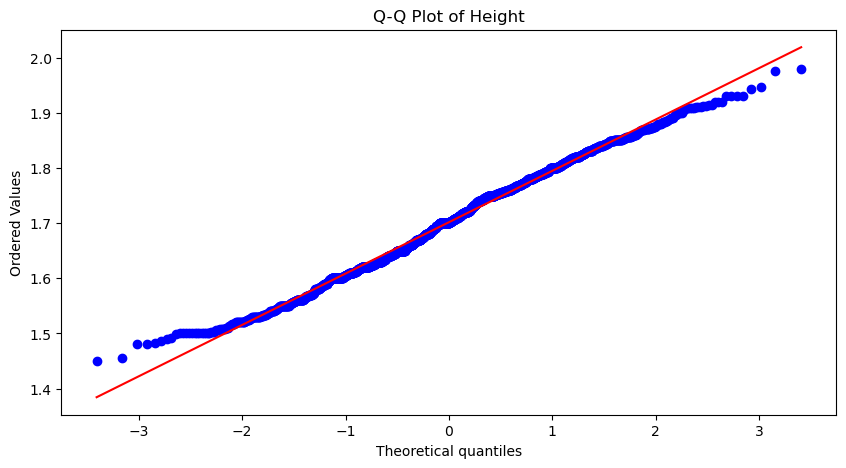

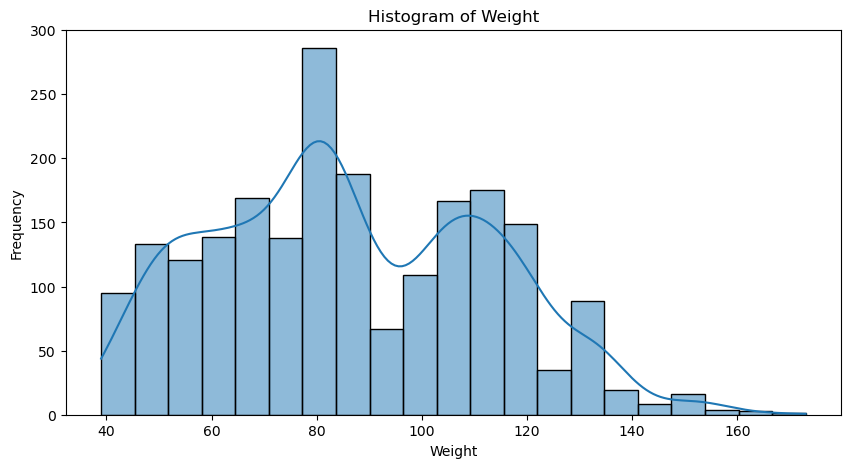

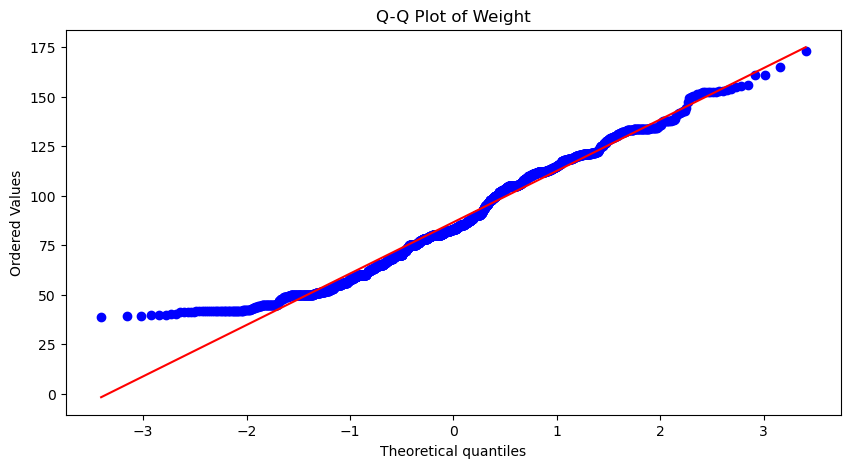

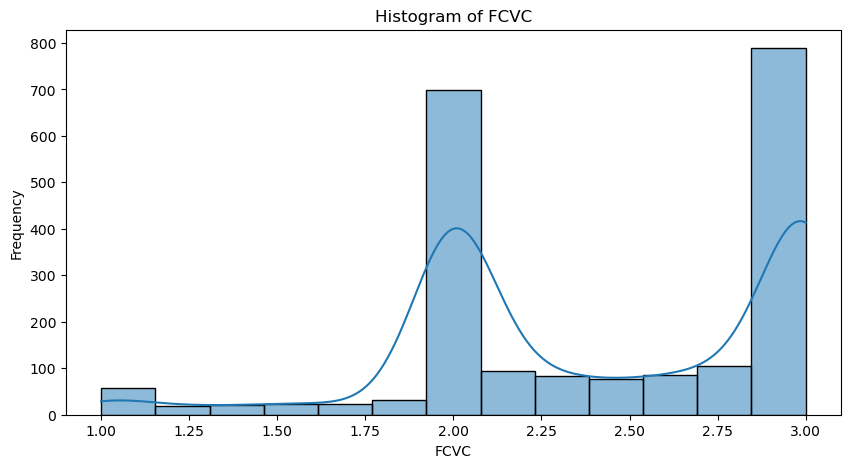

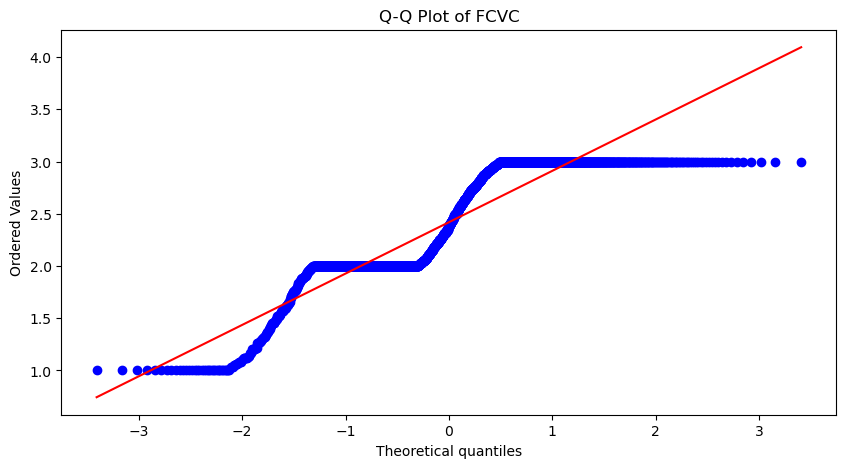

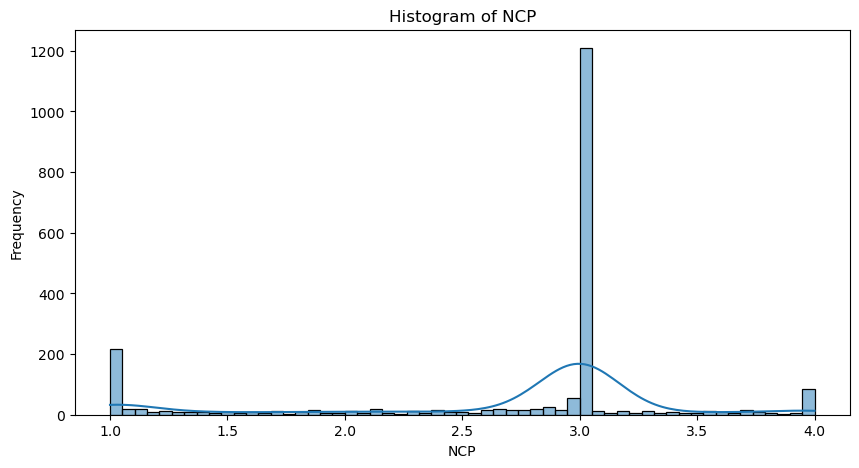

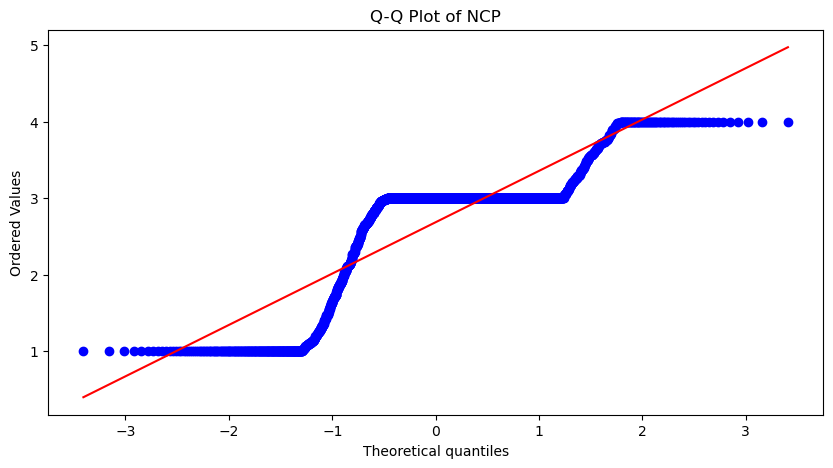

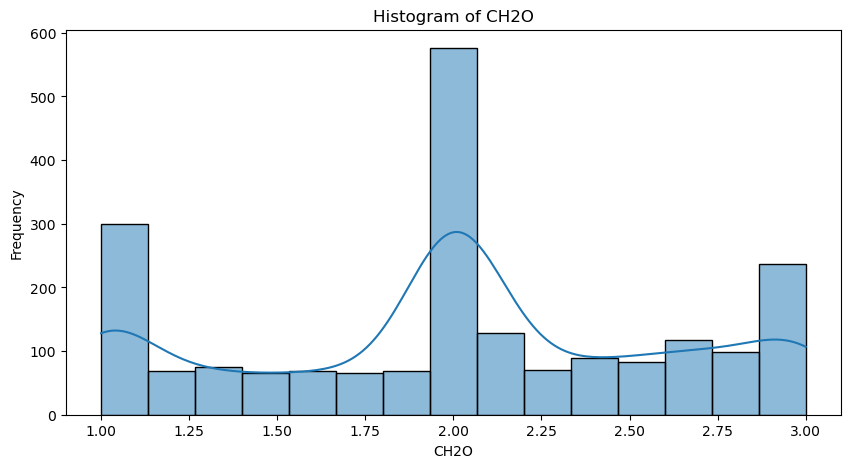

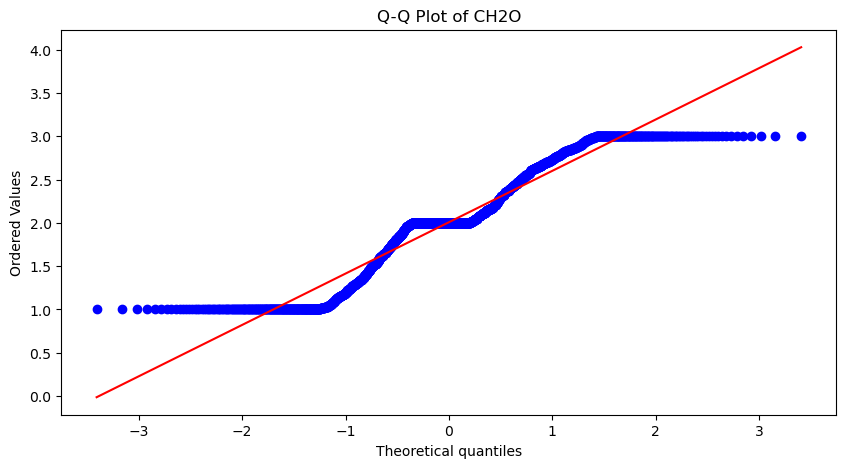

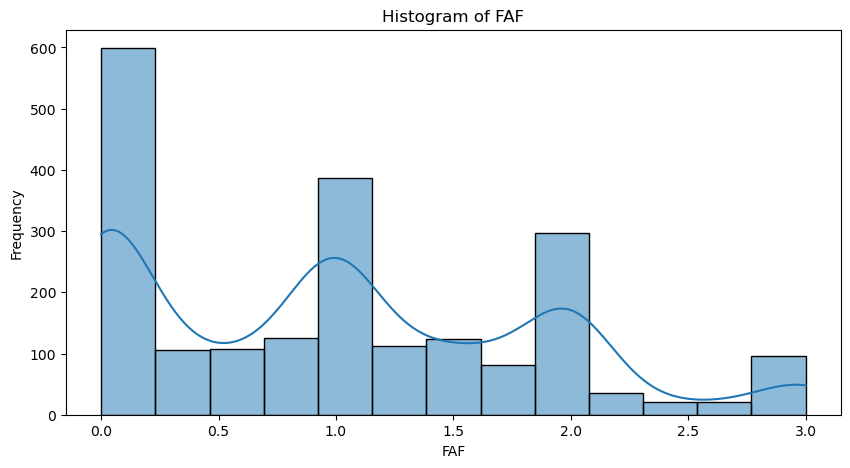

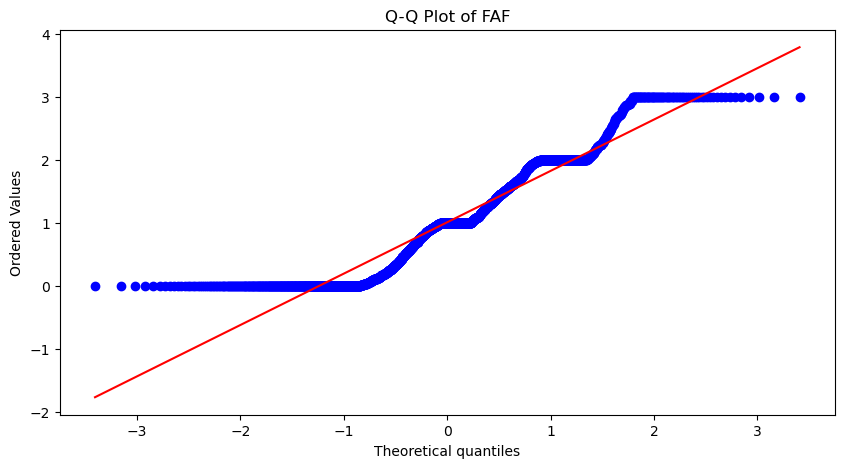

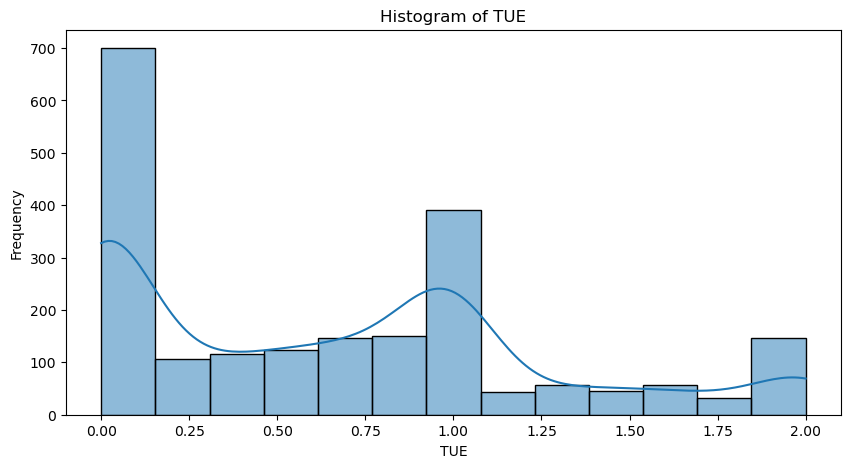

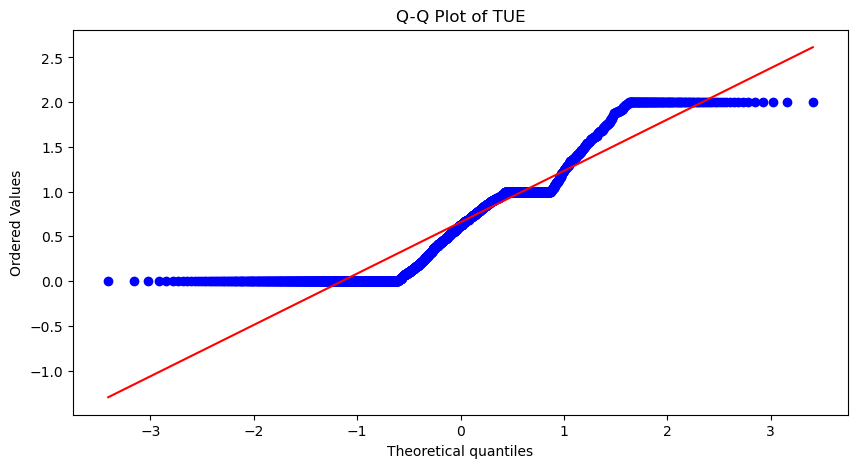

Shapiro-Wilk test for Age:
  Test Statistic: 0.8661, p-value: 0.0000
Kolmogorov-Smirnov test for Age:
  Test Statistic: 0.1597, p-value: 0.0000

Shapiro-Wilk test for Height:
  Test Statistic: 0.9932, p-value: 0.0000
Kolmogorov-Smirnov test for Height:
  Test Statistic: 0.0473, p-value: 0.0002

Shapiro-Wilk test for Weight:
  Test Statistic: 0.9765, p-value: 0.0000
Kolmogorov-Smirnov test for Weight:
  Test Statistic: 0.0603, p-value: 0.0000

Shapiro-Wilk test for FCVC:
  Test Statistic: 0.8449, p-value: 0.0000
Kolmogorov-Smirnov test for FCVC:
  Test Statistic: 0.1737, p-value: 0.0000

Shapiro-Wilk test for NCP:
  Test Statistic: 0.7409, p-value: 0.0000
Kolmogorov-Smirnov test for NCP:
  Test Statistic: 0.3402, p-value: 0.0000

Shapiro-Wilk test for CH2O:
  Test Statistic: 0.9336, p-value: 0.0000
Kolmogorov-Smirnov test for CH2O:
  Test Statistic: 0.1319, p-value: 0.0000

Shapiro-Wilk test for FAF:
  Test Statistic: 0.9152, p-value: 0.0000
Kolmogorov-Smirnov test for FAF:
  Test Stati

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Read the CSV file into a DataFrame
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Visual Inspection: Histograms and Q-Q plots
for column in numerical_columns:
    # Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    # Q-Q plot
    plt.figure(figsize=(10, 5))
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.show()

# Statistical Tests: Shapiro-Wilk test and Kolmogorov-Smirnov test
for column in numerical_columns:
    # Shapiro-Wilk test
    shapiro_test = stats.shapiro(df[column].dropna())
    print(f'Shapiro-Wilk test for {column}:')
    print(f'  Test Statistic: {shapiro_test[0]:.4f}, p-value: {shapiro_test[1]:.4f}')
    
    # Kolmogorov-Smirnov test
    ks_test = stats.kstest(df[column].dropna(), 'norm', args=(df[column].mean(), df[column].std()))
    print(f'Kolmogorov-Smirnov test for {column}:')
    print(f'  Test Statistic: {ks_test[0]:.4f}, p-value: {ks_test[1]:.4f}')
    print()


In [ ]:
#####by seeing statistics in last 2 query,I thought there is a standard normal distribution but no
#####reason--no columns are fit for mean imputation because Shapiro-Wilk test for any columns looks more than 0.05
                                                                